# Neural Networks for Machine Learning Project - Zane Bayer - CSCI 520 - 5/17/2022

## *Part I: Convolutional Neural Networks for Image Analysis*

### Context

Paper: https://arxiv.org/pdf/1512.03385.pdf

data: https://www.tensorflow.org/datasets/catalog/overview

Models: https://www.tensorflow.org/api_docs/python/tf/keras/


### Preliminary Work

 Watch Coursera videos here on getting started with TensorFlow: https://www.coursera.org/learn/getting-started-with-tensor-flow2/home/welcome

Watch Coursera videos for weeks 1-2 on custimizng your models: https://www.coursera.org/learn/customising-models-tensorflow2/home/welcome



### Exploratory Data Analysis



*   You shall conduct a comprehensive statistical analysis of any of the datasets used in the paper and discuss your results.

*   You shall develop data visualizations of examples/instances in any of the datasets or your statistical analyses and discuss your results. You may use dimesionality reduction libraries to plot high-dimensional data.







 I chose to do a statistical analysis of the CIFAR-10 image datset which was anlyzed in He's Residual Network paper.

In [ ]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

2.8.0


In [ ]:
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

x=np.append(xTrain,xTest,axis=0)
y=np.append(yTrain,yTest,axis=0)
print(x.shape,y.shape)

x=x/255.0
y=y.flatten()

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(60000, 32, 32, 3) (60000, 1)


In [ ]:
print('Dataset Dimensions: INPUTS:',x.shape,'---- TARGETS:',y.shape)
#print('# of UNIQUE INPUT WORDS:',len(np.unique(np.hstack(x))))
print('TARGET CLASSES:',np.unique(y))



Dataset Dimensions: INPUTS: (60000, 32, 32, 3) ---- TARGETS: (60000,)
TARGET CLASSES: [0 1 2 3 4 5 6 7 8 9]


Below is plot of class distribution for the dataset. Unsuprisingly, we can see that the 10 classes have an equal amount of samples. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


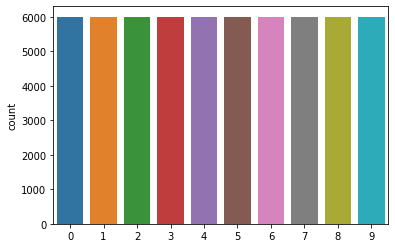

In [ ]:
sb.countplot(y)

Next, I wanted to look at some random samples from the dataset, so I created the following function. It takes in the dataset and an integer n, then plots a nxn matrix of randomly sampled images from the dataset.

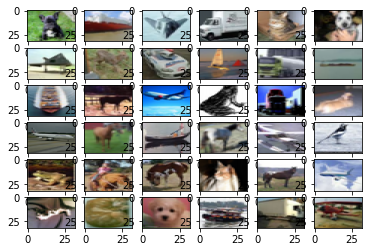

In [ ]:
import random

def plotImageMatrix(imageSet,n):
  #plots a nxn matrix of images randomly sampled 
  #from the provided 'imageSet'
  fig, ax = plt.subplots(n, n)
  N=imageSet.shape[0]
 
  for i in range(n):
      for j in range(n):
        k=random.randint(0,N)
        ax[i][j].imshow(imageSet[k], aspect='auto')
        
 
  return

plotImageMatrix(x,6)

Next, I wanted to consider how whole classes of images compare to one another. To do so I created the following function. It takes in the images,labels, and integer 'labelNum'. For the class of images specified by 'LabelNum', the function computes the mean image for that class by summing over all images in the class and dividing by the number of samples in the class. This produces a single (32,32,3) image which is then plotted. This mean image gives us a sense of sort features, such as shapes or colors, are common across a given class. The function also a produces a intensity heatmap for the mean image. This heatmap is produced by finding the 'magnitude' of the RGB image by the following formula:
<center> $Magnitude(x,y)=\sqrt{R(x,y)^2+G(x,y)^2+B(x,y)^2}$</center>

That is, we find the magnitude of each pixel over the 3 RGB layers which produces a (32,32) image. This heatmap allows us to more easily identify shapes in the mean image

In [ ]:
def meanImage(imgSet,labels,labelNum):
  #function to find mean image of a class in the data set. Given the image set and 
  #a label number, the function comput the mean image of all the images with in 
  #that class and display an RGB and heat map of that image 
  
  plotLabel=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
  labelSet=[]
  print('Mean Image Plots for Class',labelNum,':',plotLabel[labelNum])
  for i in range(len(x)):
    if y[i]==labelNum:
      labelSet.append(imgSet[i])

  meanImg=np.array(labelSet)
  #print(meanImg.shape)

  meanImg=np.mean(meanImg,axis=0)
  #print(meanImg.shape)

  fig, axs = plt.subplots(2)
  fig.set_figheight(10)
  fig.set_figwidth(10)
  
  meanImgMag=np.sqrt(np.square(meanImg[:,:,0])+np.square(meanImg[:,:,1])+np.square(meanImg[:,:,2]))
  
  hp=plt.imshow(meanImgMag,cmap='hot')
  axs[1].set_title('Heatmap of RGB magnitudes')
  axs[1]=hp
  fig.colorbar(axs[1])
  axs[0].set_title('Mean RGB')
  axs[0].imshow(meanImg)


  return



Below are 10 cells where I've applied the 'meanImg' function to each class. It's interesting to compare the heatmaps for the different classes and noting first how the ranges intensity are all relatively equal for each class and second how the shapes are different for each class. This is perhaps something that a model could pick up on during training. Specifically, for convolutional models these shapes might help us explain the filters which the model learns to discern between classes.

Mean Image Plots for Class 0 : Airplane


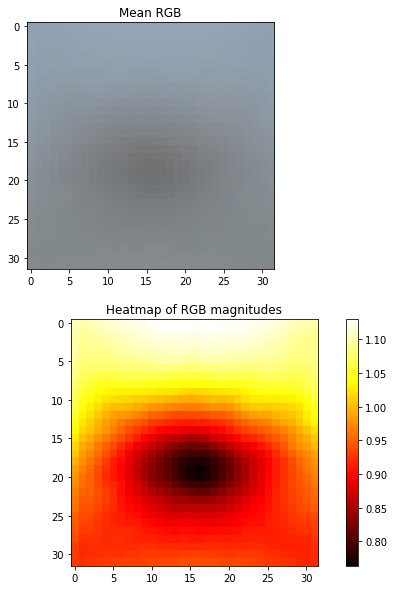

In [ ]:
meanImage(x,y,0)

Mean Image Plots for Class 1 : Automobile


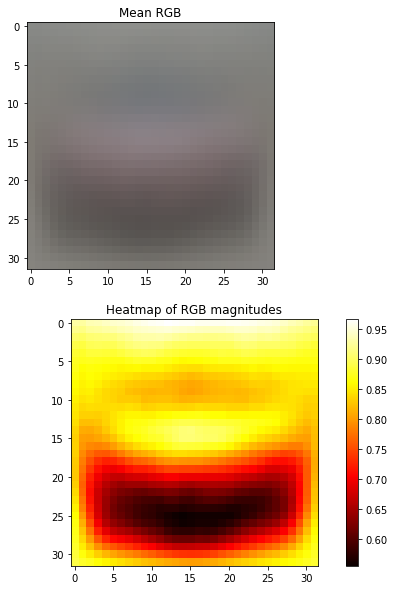

In [ ]:
meanImage(x,y,1)

Mean Image Plots for Class 2 : Bird


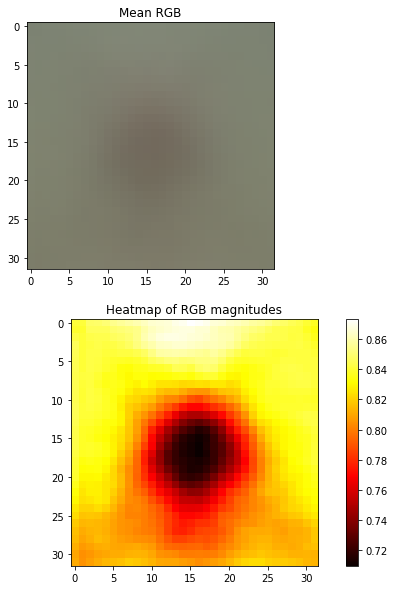

In [ ]:
meanImage(x,y,2)

Mean Image Plots for Class 3 : Cat


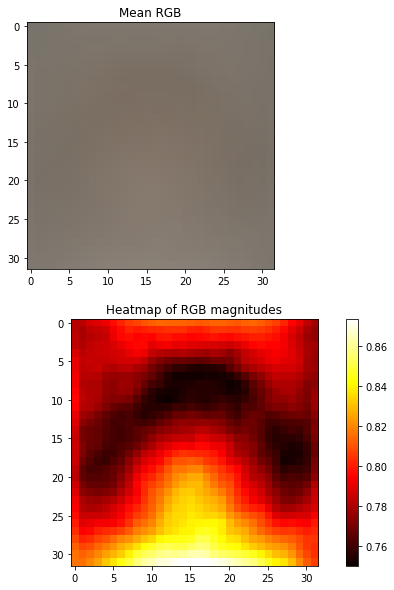

In [ ]:
meanImage(x,y,3)

Mean Image Plots for Class 4 : Deer


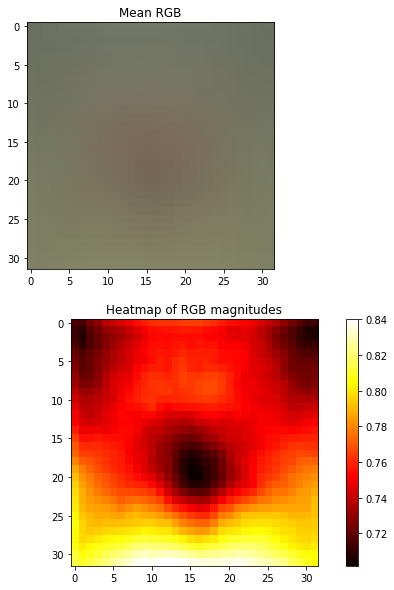

In [ ]:
meanImage(x,y,4)

Mean Image Plots for Class 5 : Dog


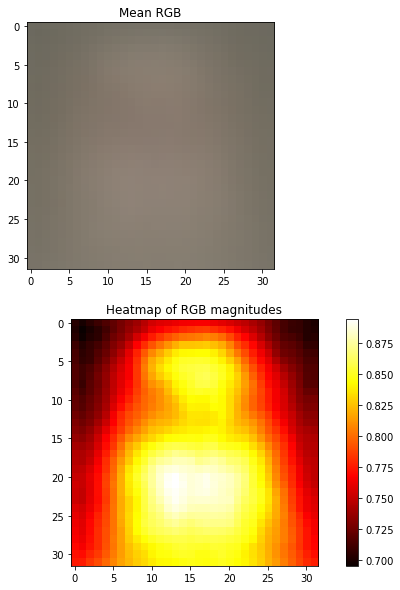

In [ ]:
meanImage(x,y,5)

Mean Image Plots for Class 6 : Frog


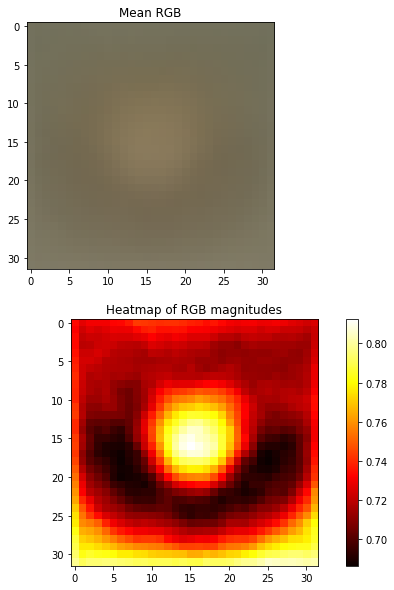

In [ ]:
meanImage(x,y,6)

Mean Image Plots for Class 7 : Horse


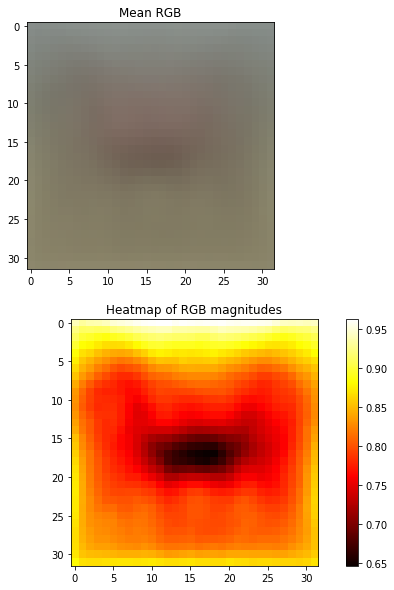

In [ ]:
meanImage(x,y,7)

Mean Image Plots for Class 8 : Ship


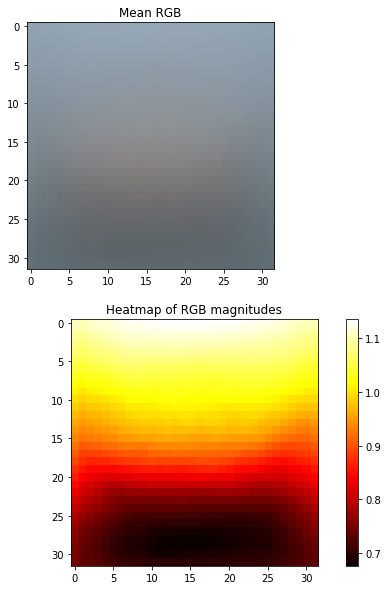

In [ ]:
meanImage(x,y,8)

Mean Image Plots for Class 9 : Truck


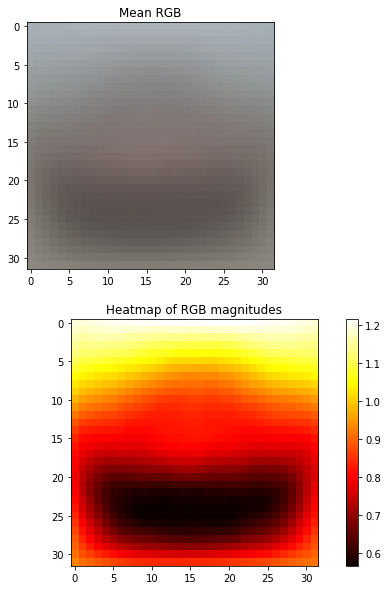

In [ ]:
meanImage(x,y,9)

The next several cells apply PCA to the dataset. The images are flattened to produce vectors (1024,3) in size. The images are then averaged over the RGB channels to produce vectors (1024) in size. PCA is then applied.

In [ ]:
x=np.append(xTrain,xTest,axis=0)
x=x/255.0
x=x.reshape(60000,32**2,3)
x=x.mean(axis=2)
x.shape

(60000, 1024)

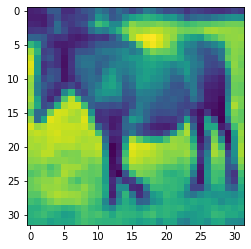

In [ ]:
plt.imshow(x[7].reshape(32,32))

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
xt=pca.fit_transform(x)

The scatter plot below compare the first two PCA components for each data point. As we can see, the first components are not enough to discriminate between the 10 classes. 

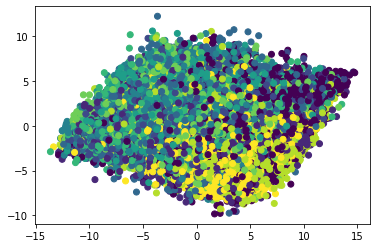

In [ ]:
plt.scatter(xt[:,0],xt[:,1],c=y)

In [ ]:
x=x-x.mean()
z=x/x.std()
print('sanity check:',z.mean(),z.std())

z=np.dot(z.T,z)
eVals,eVectors=np.linalg.eig(z)

D=np.diag(eVals)
p=eVectors

zNew = np.dot(z, p)

sanity check: 1.1044054559761207e-15 1.000000000000002


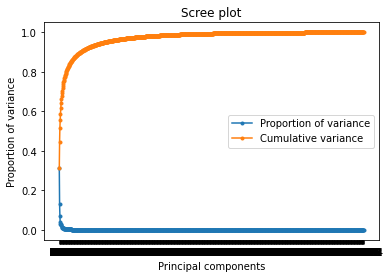

In [ ]:

sumeVals = np.sum(eVals)

propVar = [i/sumeVals for i in eVals]
cumVar = [np.sum(propVar[:i+1]) for i in range(len(propVar))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(propVar))]

plt.plot(x_labels, propVar, marker='.', label='Proportion of variance')
plt.plot(x_labels, cumVar, marker='.', label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

The scree plot suggests we would need to consider around 40 PCA components to account for ~85% of the variance. This is far too many to be useful for visualization, but could useful for downsampling data before training.

### Reproduce Research Results



*   You shall use TensorFlow APIs to imitate Fig. 4 in the paper for ResNet-50 and ResNet-101 and reproduce the results in Tab. 3 and Tab. 4 for both ResNet-50 and ResNet-101 and discuss your experiment.





The cells below use the keras library to load pre-created residual net models.

In [ ]:
import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras.applications import ResNet50, ResNet101
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt



Unfortunately, the ImageNet data used to produce the results in He's paper is not easilt available through TensorFlow. Additionally, ImageNet's size (~14 million images) poses some difficulties in terms of computational cost and data mangement in a .ipynb format. For these reasons, I opted to train the ResNet models on the CIFAR-100 dataset which available through Keras. Besides, I attemped to used the same training procedure as presented in the paper which involved using the Adam optimer with momentum and a learning rate scheduler.

In [ ]:
cifar100 = tf.keras.datasets.cifar100
# Distribute it to train and test set
(xTrain, yTrain), (xTest, yTest) = cifar100.load_data()
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

x=np.append(xTrain,xTest,axis=0)
y=np.append(yTrain,yTest,axis=0)
print(x.shape,y.shape)

x=x/255.0
y=y.flatten()


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(60000, 32, 32, 3) (60000, 1)


Loading Keras ResNet models and specifying the number of target classes and the input dimensions.

In [ ]:
model1=ResNet50(weights=None,classes=100,input_shape=(32,32,3))
model2=ResNet101(weights=None,classes=100,input_shape=(32,32,3))

Separating 10000 training samples to be used for validation.

In [ ]:
xVal=xTrain[-10000:]
yVal=yTrain[-10000:]
xTrain=xTrain[:-10000]
yTrain=yTrain[:-10000]

The models were trained for 30 epochs which would require over a day of training time in Google Colab. For this reason, I ran these cells on my local machine to gather results which reduced the training time significantly. I include the training cells here only for complete clarity of the training procedure. The next cell implements the learning schedule which reduces the learning rate at epochs 10 and 20 by dividing by 10.

In [ ]:

def scheduler(epoch, lr):
   if epoch==10 or epoch==20:
     return lr/10
   else:
     return lr 

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model1.compile(optimizer=opt,loss=K.losses.SparseCategoricalCrossentropy(),metrics=['accuracy','top_k_categorical_accuracy',])

In [ ]:
history=model1.fit(xTrain,yTrain,epochs=30,batch_size=10,validation_data=(xVal,yVal))

Epoch 1/30
   3/5000 [..............................] - ETA: 1:06:40 - loss: 26.7690 - accuracy: 0.0333 - top_k_categorical_accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:

a=history.history['val_accuracy']

b=np.ones(len(a))-a

c=np.ones(len(a))-history.history['accuracy']

plt.plot(c,label='Training Error')
plt.plot(b,label='Validation Error')

plt.legend()

In [ ]:
cifar100 = tf.keras.datasets.cifar100
 
# Distribute it to train and test set
(xTrain, yTrain), (xTest, yTest) = cifar100.load_data()
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

x=np.append(xTrain,xTest,axis=0)
y=np.append(yTrain,yTest,axis=0)
print(x.shape,y.shape)

x=x/255.0
y=y.flatten()

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(60000, 32, 32, 3) (60000, 1)


In [ ]:
model2=ResNet101(weights=None,classes=100,input_shape=(32,32,3))

In [ ]:
xVal=xTrain[-10000:]
yVal=yTrain[-10000:]
xTrain=xTrain[:-10000]
yTrain=yTrain[:-10000]


In [ ]:
model2.compile(optimizer=opt,loss=K.losses.SparseCategoricalCrossentropy(),metrics=['accuracy','top_k_categorical_accuracy',])

In [ ]:
callback=tf.keras.callbacks.LearningRateScheduler(scheduler)
history=model2.fit(x_train,y_train,epochs=30,batch_size=32,callbacks=[callback],validation_data=(xVal,yVal))

Epoch 1/30
   2/1250 [..............................] - ETA: 1:21:45 - loss: 13.3073 - accuracy: 0.0000e+00 - top_k_categorical_accuracy: 0.0469   

KeyboardInterrupt: ignored

In [ ]:
a=history.history['val_accuracy']

b=np.ones(len(a))-a

c=np.ones(len(a))-history.history['accuracy']

plt.plot(c,label='Training Error')
plt.plot(b,label='Validation Error')

plt.legend()

Refer to the paper for the plots and result of this section. To summarize, the models only achieved middling results and seemed to overfit the training data.

## *Part II: Transformers for Text Analysis*

### Context

Paper: https://arxiv.org/pdf/1706.03762.pdf

Data: https://keras.io/api/datasets/

Source: https://keras.io/examples/nlp/text_classification_with_transformer/


### Preliminary Work

Watch Coursera videos for weeks 3-4 on customizing your models: https://www.coursera.org/learn/customising-models-tensorflow2/home/welcome


### Exploratory Data Analysis



*   You shall conduct a comprehensive statistical analysis of any of the natural language datasets in  *tf.keras.datasets* and discuss your results.


*   You shall develop data visualizations of examples/instances in any of the natural language datasets or your statistical analyses and discuss your results. You may use the dimensionality reduction libraries to plot high-dimensional data.



Below is a analysis of the IMDB Dataset availabe through the keras library. (https://keras.io/api/datasets/imdb/)

In [ ]:
from keras.datasets import imdb
import numpy as np 
import matplotlib.pyplot as plt


(xTrain, yTrain), (xTest, yTest) = imdb.load_data()
x= np.concatenate((xTrain, xTest), axis=0)
y = np.concatenate((yTrain, yTest), axis=0)


17473536/17464789 [==============================] - 0s 0us/step


Below is simple, but rather informative cell. It tels the dimensions of the dataset, the number of unique words present, the classes in the target set, and provides information on length of reviews. For review lengths: the mean, standard deviation, and a plot of length distribution are shown. As can be seen the average review length is ~235, but there is a large standard deviation. The distributioon plot suggests that most reviews tend to be short, while only few reach lengths above ~750.

Dataset Dimensions: INPUTS: (50000,) ---- TARGETS: (50000,)
# of UNIQUE INPUT WORDS: 88585
TARGET CLASSES: [0 1] ----- # NEGATIVE: 25000 ----- # POSITIVE:  25000
AVERAGE REVIEW LENGTH: 234.75892 ----- STD: 172.91149458735703


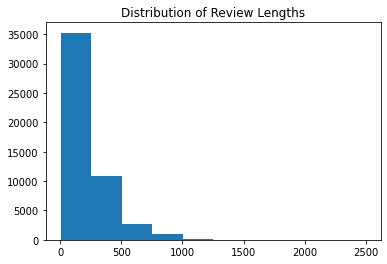

In [ ]:
print('Dataset Dimensions: INPUTS:',x.shape,'---- TARGETS:',y.shape)
print('# of UNIQUE INPUT WORDS:',len(np.unique(np.hstack(x))))
print('TARGET CLASSES:',np.unique(y),'----- # NEGATIVE:',y.size-np.count_nonzero(y),'----- # POSITIVE: ', np.count_nonzero(y))

revLen = [len(i) for i in x]
print('AVERAGE REVIEW LENGTH:',np.mean(revLen),'----- STD:',np.std(revLen))

# plot review length distribution
plt.title('Distribution of Review Lengths')
plt.hist(revLen)
plt.show()


Next, I wanted to get a sense of the word frequency and the most common words which show up in the dataset. The cell below grabs this metadata for the IMDB dataset and lists the 30 most frequent words from the reviews. The results are what you'd likely suspect. The most commonly used words in the reviews are some of the most common words in the english language which can be used in most contexts.

In [ ]:
wordDict = imdb.get_word_index()
n = len(wordDict)
wordFreq = []
for (k,v) in wordDict.items():
  wordFreq.append((k,v))

sortWord = sorted(wordFreq, key=lambda x: x[1])

numTopWords=30
print(numTopWords,'most common words:')
for i in range(numTopWords):
  if i%10==0:
    print('\n')
    print([sortWord[i:i+10]])
  

30 most common words:


[[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10)]]


[[('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20)]]


[[('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30)]]


Below is cell to find the length of the longest movie review in the dataset. The cells following perform principal component analysis on the dataset. This is done by zero-padding all the vectors to the maximum length, so that all the samples are in the same dimensional vector space. The sklearn library's PCA implementation is then applied the dataset.

In [ ]:
maxLen=0
for i in range(len(x)):
  temp=len(x[i])
  if maxLen<temp:
    maxLen=temp

print(maxLen)

2494


In [ ]:
x0=np.array(x[0]).T
mat=np.append(x0,np.zeros(maxLen-len(x0)))

for i in range(1,len(x)):
  temp=np.array(x[i]).T
  temp=np.append(temp,np.zeros(maxLen-len(x[i])))
  mat=np.append(mat,temp,axis=0)
  if i%5000==0: print(i)

print(mat.shape)

5000
10000
15000
20000
25000
30000
35000
40000
45000
(124700000,)


In [ ]:
mat=mat.reshape(50000,maxLen)

Below is a scatter plot of the first 2 components $(x_1,x_2)$ for each sample. As we can see, these two features do not clearly define a separation between the two classes. This makes sense, since we are deaing with vectors in a high dimensional vector space. 

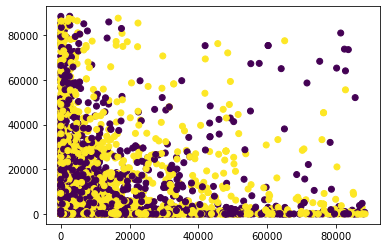

In [ ]:
plt.scatter(mat[:,1],mat[:,2],c=y)

Next, the PCA is applied to the dataset. The scatter plot plots the first 2 PCA components for each sample. In theory, these first 2 components account for the most variance in the dataset. However, as we can see in the scatterplot these two PCA components are not sufficient to seperate the data. 

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
xt=pca.fit_transform(mat)

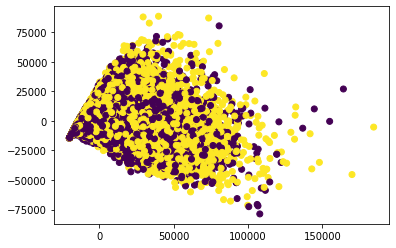

In [ ]:
plt.scatter(xt[:,0],xt[:,1],c=y)

The next cells create a scree plot. The scree plot compares the number of PCA components versus the amount of variance accounted for by that number of PCA components.

In [ ]:
x=mat

x=x-x.mean()
z=x/x.std()
print('sanity check:',z.mean(),z.std())

z=np.dot(z.T,z)
eVals,eVectors=np.linalg.eig(z)

D=np.diag(eVals)
p=eVectors

z_new = np.dot(z, p)


sanity check: -2.6984669510927686e-17 1.000000000000002


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


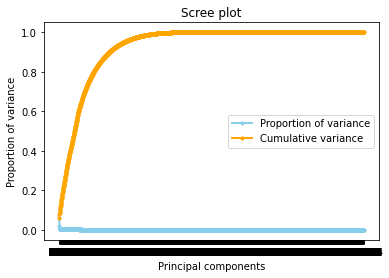

In [ ]:
sumeVals = np.sum(eVals)

propVar = [i/sumeVals for i in eVals]
cumVar = [np.sum(propVar[:i+1]) for i in range(len(propVar))]

# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(propVar))]

plt.plot(x_labels, propVar, marker='.', label='Proportion of variance')
plt.plot(x_labels, cumVar, marker='.', label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

The scree plot allows to exlain why the PCA plot was unhelpful in visualizing the data. The blue curve tells how much variance is explained by a given PCA component. As we can see this curve is flat, meaning each PCA component accounts for only a small porportion of the variance. The orange curve gives a clue of how many components are needed to account for a sufficient amount of variance. A good rule of thumb is that the PCA components should account for 85% or more of the variance. From the cumulative variance calculated above, we have to use around 350 PCA components to account for a sufficient proportion of the variance. While this is far less then the over 2000 dimensions we started with, it's far too many to be useful for visualization of the data.

### Classify Text



*   You shall use the source implementation to train and evaluate a text classifier with a Transformer block on any of the natural language datasets in *tf.keras.datasets* and discuss your results.



Below is the source implementation which performs text classification on the IMDB dataset.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(x_train.shape, "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

(25000,) Training sequences
25000 Validation sequences


In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

Epoch 1/2
782/782 [==============================] - 125s 157ms/step - loss: 0.3847 - accuracy: 0.8191 - val_loss: 0.2958 - val_accuracy: 0.8722
Epoch 2/2
782/782 [==============================] - 118s 151ms/step - loss: 0.2004 - accuracy: 0.9231 - val_loss: 0.3465 - val_accuracy: 0.8489


The cells below create a new transformer classifier using the source implementation and then trains the model on the Reuters dataset available through keras. (https://keras.io/api/datasets/imdb/)

In [ ]:
vocab_size = 20000  
maxlen = 1000 
(x_train, y_train), (x_val, y_val) = keras.datasets.reuters.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)



2121728/2110848 [==============================] - 0s 0us/step
8982 Training sequences
2246 Validation sequences


In [ ]:
max(max(y_train),max(y_val))

45

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(46, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val)
)

Epoch 1/5
281/281 [==============================] - 634s 2s/step - loss: 2.4061 - accuracy: 0.3974 - val_loss: 1.7986 - val_accuracy: 0.5628
Epoch 2/5
281/281 [==============================] - 539s 2s/step - loss: 1.5773 - accuracy: 0.6259 - val_loss: 1.3720 - val_accuracy: 0.6625
Epoch 3/5
281/281 [==============================] - 663s 2s/step - loss: 1.1923 - accuracy: 0.7055 - val_loss: 1.1843 - val_accuracy: 0.6923
Epoch 4/5
281/281 [==============================] - 526s 2s/step - loss: 0.9750 - accuracy: 0.7613 - val_loss: 1.0914 - val_accuracy: 0.7337
Epoch 5/5
281/281 [==============================] - 517s 2s/step - loss: 0.7949 - accuracy: 0.8026 - val_loss: 1.0838 - val_accuracy: 0.7542


The model achieves around 82% training accuracy and 77% validation accuracy. further tweaking of hyperparamters and dataset dimensions would likely improve these results.

## *Part III: Variational Autoenconder for Image Analysis*

### Context 



Paper: https://openreview.net/pdf?id=Sy2fzU9gl

Source: https://github.com/Atcold/pytorch-Deep-Learning/blob/master/11-VAE.ipynb




### Preliminary Work 

Watch Coursera videos for weeks 1,2,and 4 on probablistic deep learning: https://www.coursera.org/learn/probabilistic-deep-learning-with-tensorflow2/home/welcome




### Migrate From One Framework to Another Framework



*   You shall reproduce the results obtained with the source implementation, a VAE in PyTorch, which simply entails running the notebook without any errors to serve as a baseline. 
*   You shall migrate the source implementation to TensorFlow and reproduce the baseline results using your TensorFlow implementation. 




Below is the PyTorch VAE implementation from the source notebook.

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

In [ ]:
# Displaying routine

def display_images(in_, out, n=1, label=None, count=False):
    for N in range(n):
        if in_ is not None:
            in_pic = in_.data.cpu().view(-1, 28, 28)
            plt.figure(figsize=(18, 4))
            plt.suptitle(label + ' – real test data / reconstructions', color='w', fontsize=16)
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = out.data.cpu().view(-1, 28, 28)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')
            if count: plt.title(str(4 * N + i), color='w')

In [ ]:
# Set random seeds

torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [ ]:
# Define data loading step

batch_size = 256

kwargs = {'num_workers': 1, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    MNIST('./data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Defining the device

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Defining the model

d = 20

class VAE(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(784, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, d * 2)
        )

        self.decoder = nn.Sequential(
            nn.Linear(d, d ** 2),
            nn.ReLU(),
            nn.Linear(d ** 2, 784),
            nn.Sigmoid(),
        )

    def reparameterise(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = std.new_empty(std.size()).normal_()
            return eps.mul_(std).add_(mu)
        else:
            return mu

    def forward(self, x):
        mu_logvar = self.encoder(x.view(-1, 784)).view(-1, 2, d)
        mu = mu_logvar[:, 0, :]
        logvar = mu_logvar[:, 1, :]
        z = self.reparameterise(mu, logvar)
        return self.decoder(z), mu, logvar

model = VAE().to(device)

In [ ]:
# Setting the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

In [ ]:
# Reconstruction + β * KL divergence losses summed over all elements and batch

def loss_function(x_hat, x, mu, logvar, β=1):
    BCE = nn.functional.binary_cross_entropy(
        x_hat, x.view(-1, 784), reduction='sum'
    )
    KLD = 0.5 * torch.sum(logvar.exp() - logvar - 1 + mu.pow(2))

    return BCE + β * KLD

====> Test set loss: 544.4362
====> Epoch: 1 Average loss: 191.1198
====> Test set loss: 137.1604
====> Epoch: 2 Average loss: 133.1453
====> Test set loss: 116.4916
====> Epoch: 3 Average loss: 121.2099
====> Test set loss: 109.2326
====> Epoch: 4 Average loss: 116.1210
====> Test set loss: 105.3550
====> Epoch: 5 Average loss: 113.3736
====> Test set loss: 103.6838
====> Epoch: 6 Average loss: 111.5294
====> Test set loss: 101.2446
====> Epoch: 7 Average loss: 110.2212
====> Test set loss: 100.3261
====> Epoch: 8 Average loss: 109.2813
====> Test set loss: 99.4506
====> Epoch: 9 Average loss: 108.4623
====> Test set loss: 98.1582
====> Epoch: 10 Average loss: 107.8393
====> Test set loss: 98.1428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


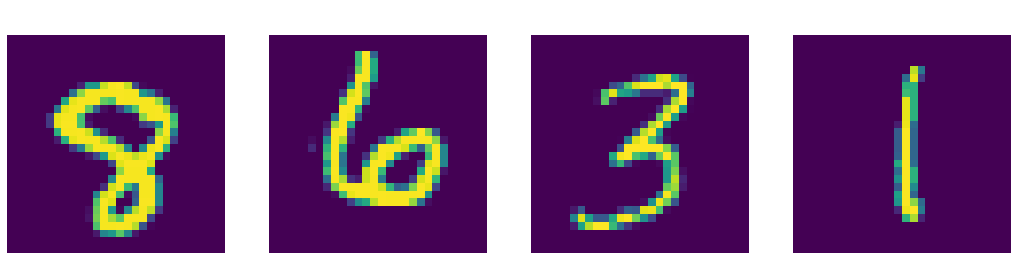

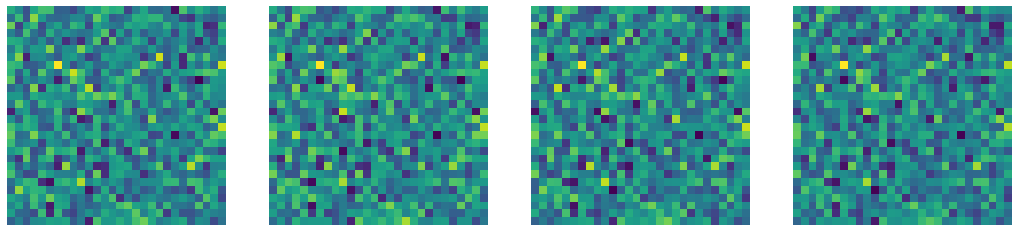

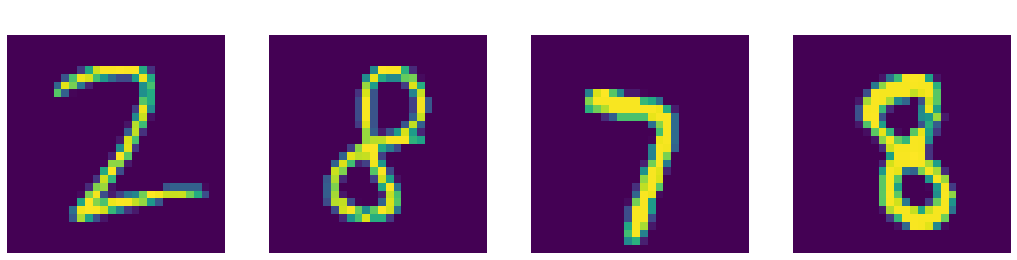

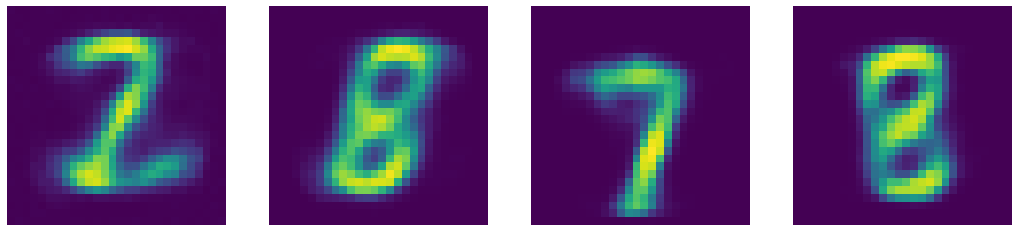

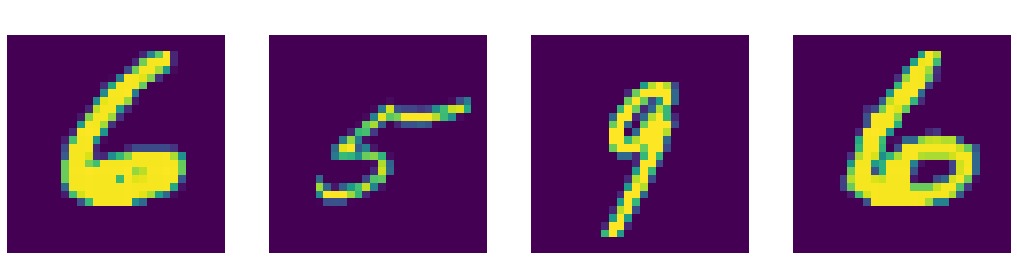

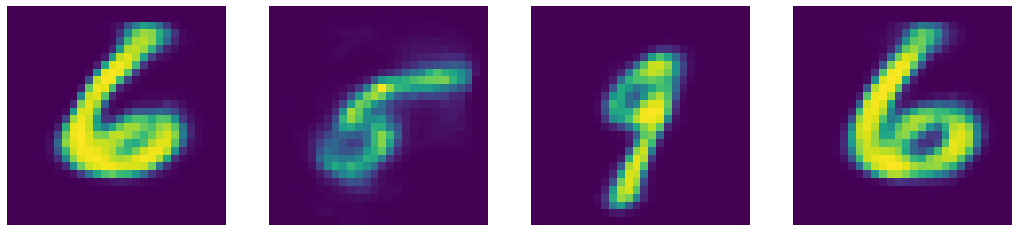

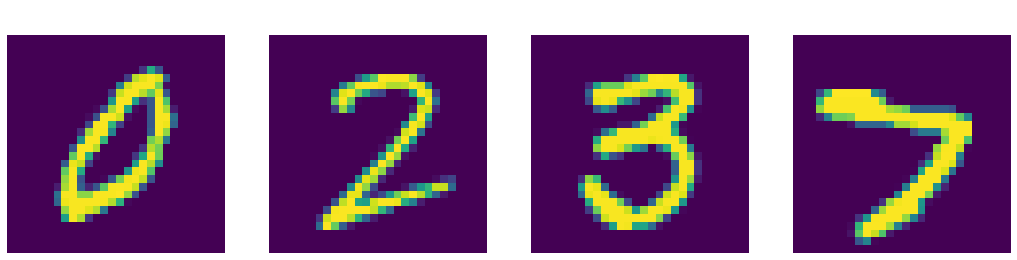

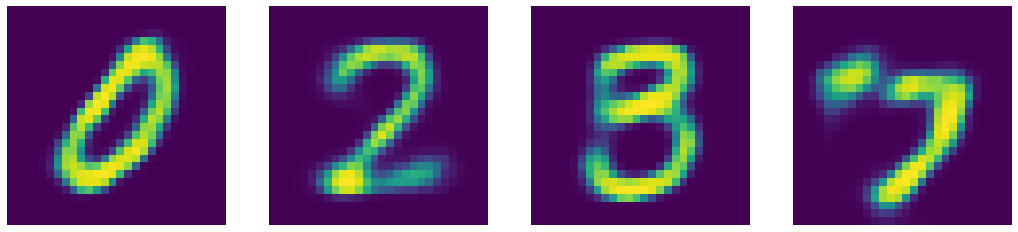

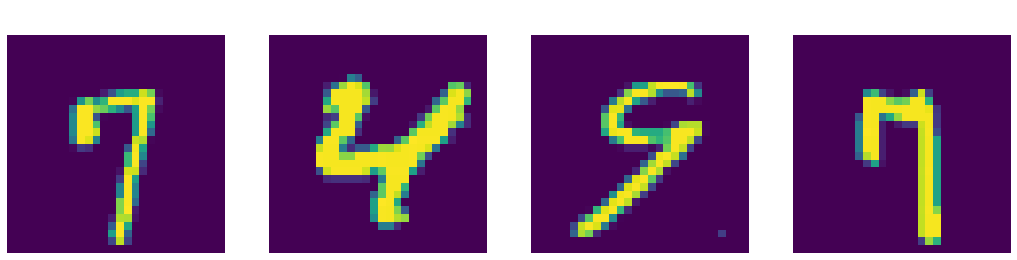

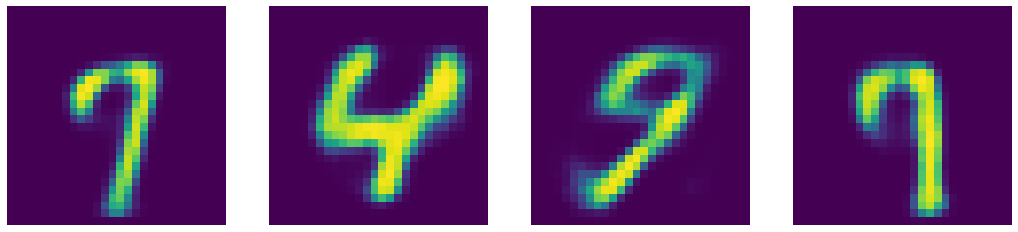

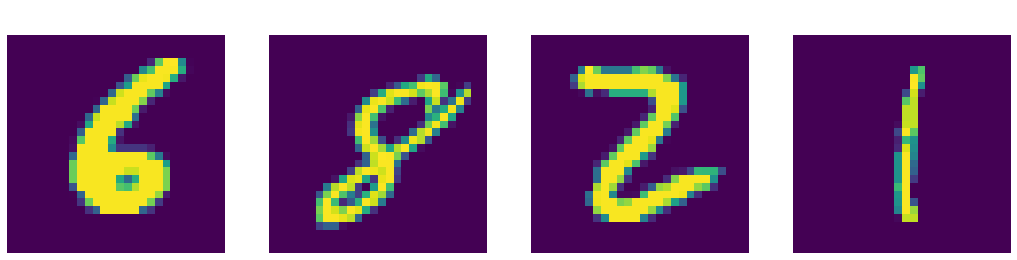

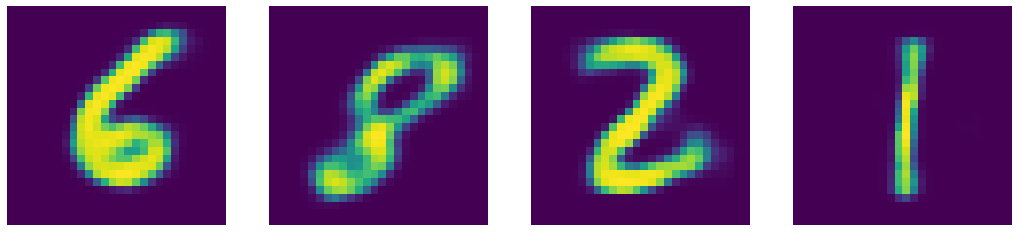

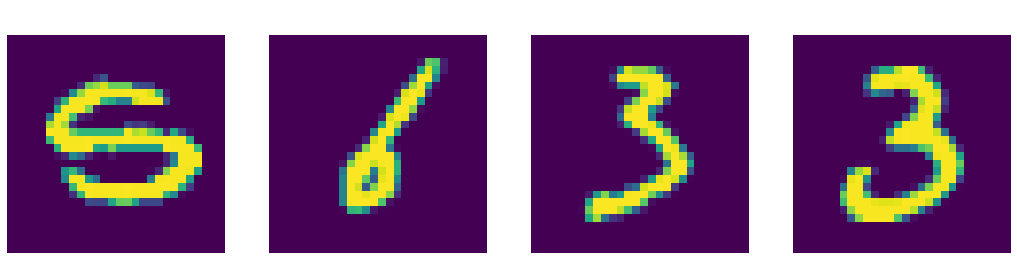

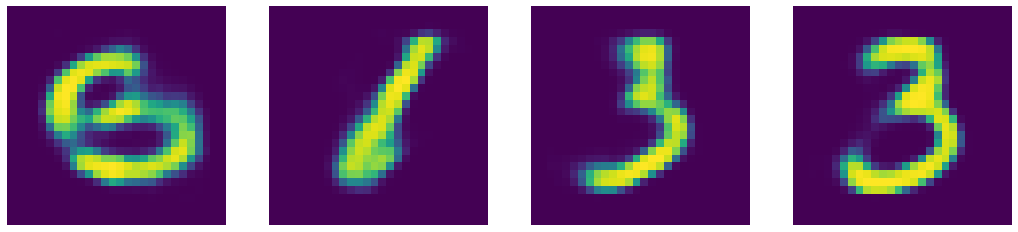

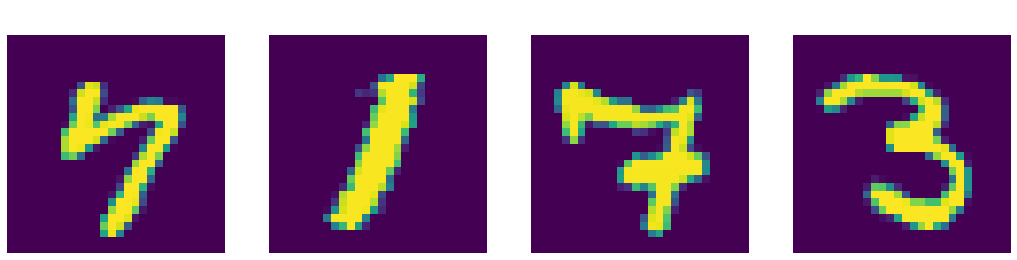

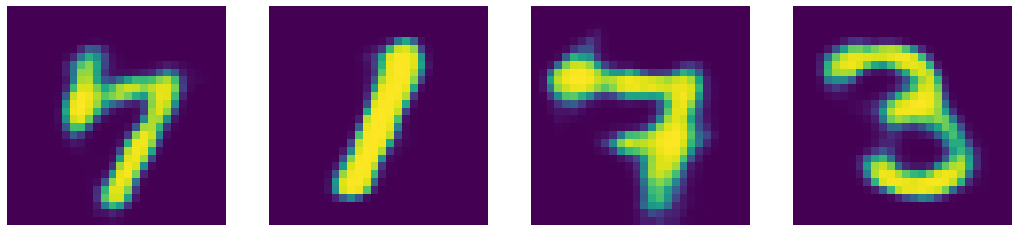

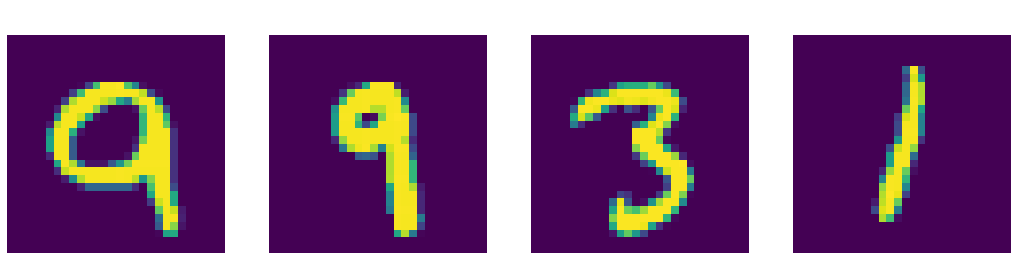

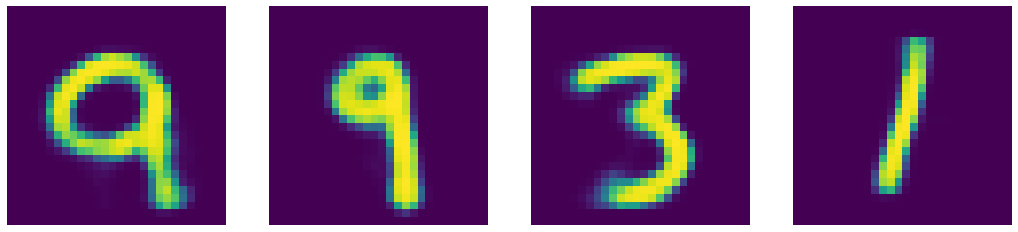

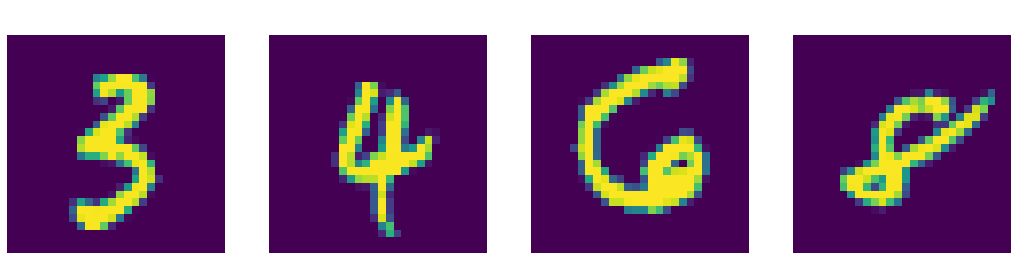

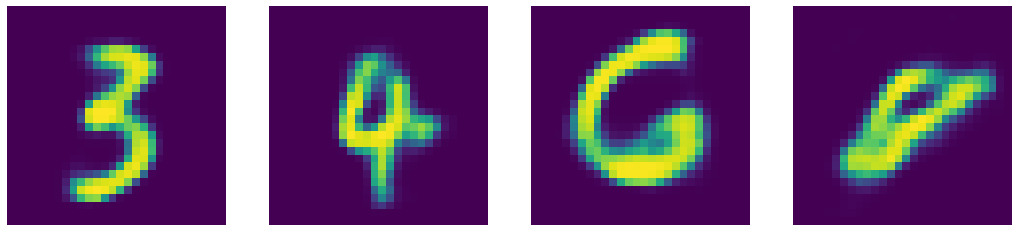

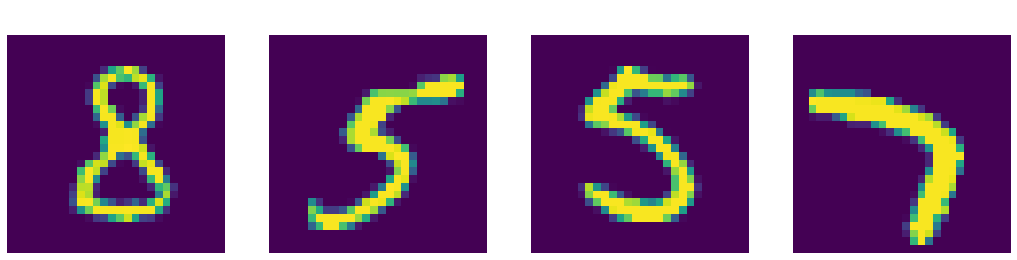

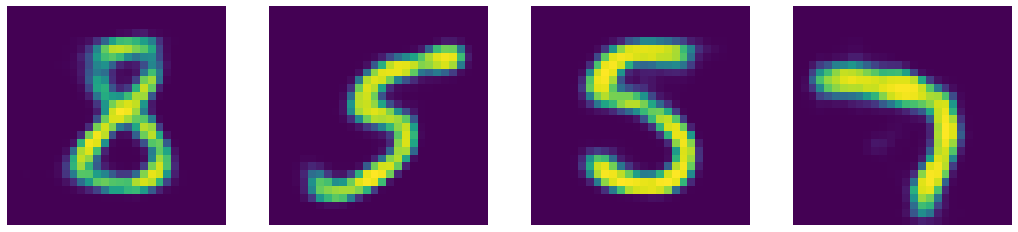

In [ ]:
# Training and testing the VAE

epochs = 10
codes = dict(μ=list(), logσ2=list(), y=list())
for epoch in range(0, epochs + 1):
    # Training
    if epoch > 0:  # test untrained net first
        model.train()
        train_loss = 0
        for x, _ in train_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            loss = loss_function(x_hat, x, mu, logvar)
            train_loss += loss.item()
            # ===================backward====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # ===================log========================
        print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')
    
    # Testing
    
    means, logvars, labels = list(), list(), list()
    with torch.no_grad():
        model.eval()
        test_loss = 0
        for x, y in test_loader:
            x = x.to(device)
            # ===================forward=====================
            x_hat, mu, logvar = model(x)
            test_loss += loss_function(x_hat, x, mu, logvar).item()
            # =====================log=======================
            means.append(mu.detach())
            logvars.append(logvar.detach())
            labels.append(y.detach())
    # ===================log========================
    codes['μ'].append(torch.cat(means))
    codes['logσ2'].append(torch.cat(logvars))
    codes['y'].append(torch.cat(labels))
    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')
    display_images(x, x_hat, 1, f'Epoch {epoch}')


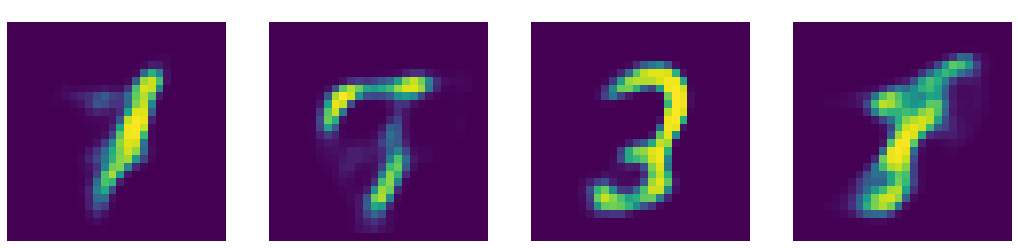

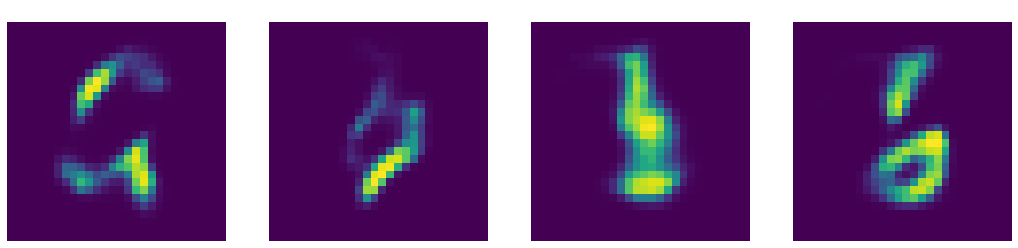

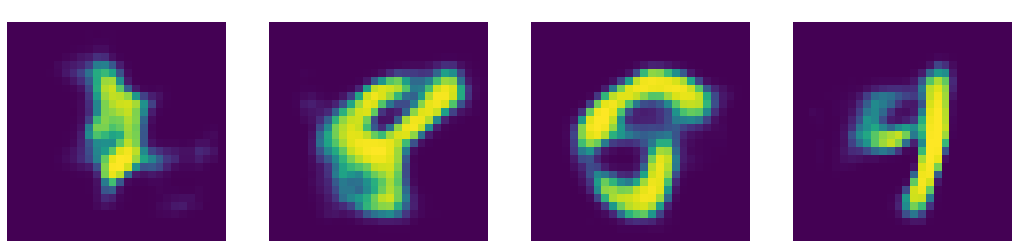

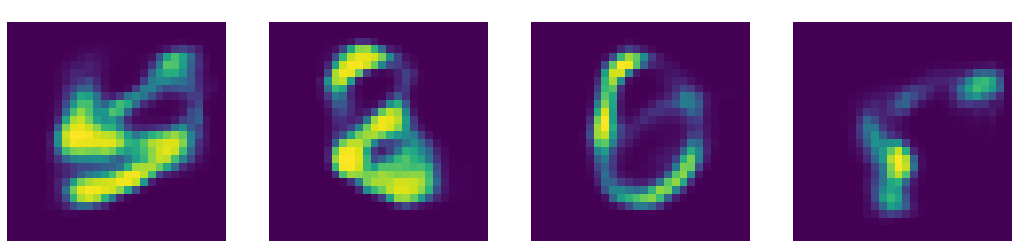

In [ ]:
# Generating a few samples

N = 16
z = torch.randn((N, d)).to(device)
sample = model.decoder(z)
display_images(None, sample, N // 4, count=True)

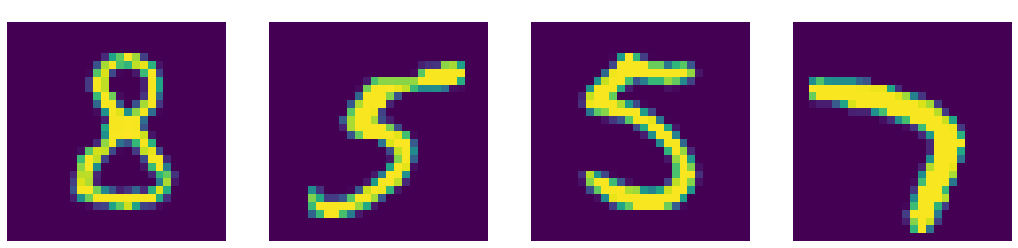

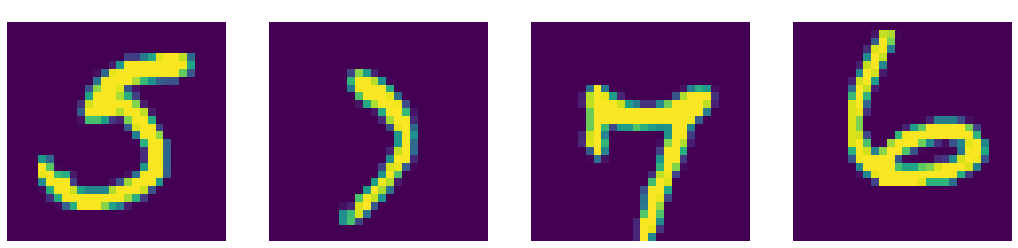

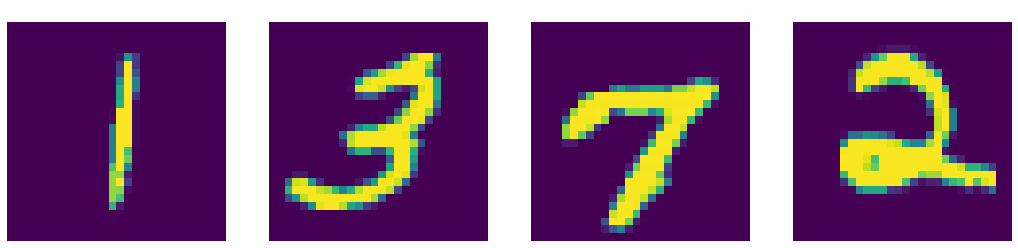

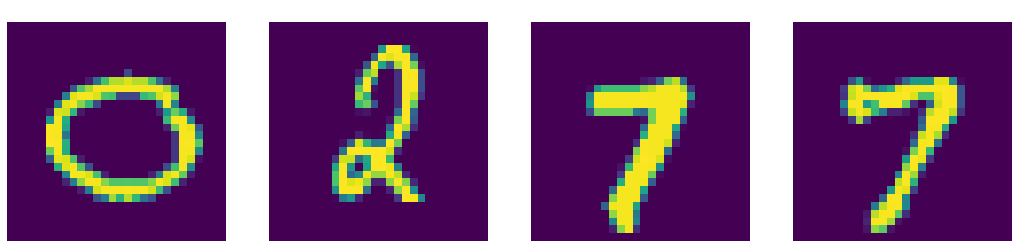

In [ ]:
# Display last test batch

display_images(None, x, 4, count=True)

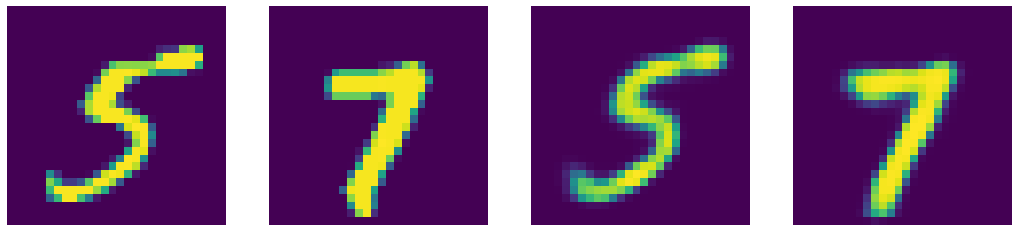

In [ ]:
# Choose starting and ending point for the interpolation -> shows original and reconstructed

A, B = 1, 14
sample = model.decoder(torch.stack((mu[A].data, mu[B].data), 0))
display_images(None, torch.stack(((
    x[A].data.view(-1),
    x[B].data.view(-1),
    sample.data[0],
    sample.data[1]
)), 0))

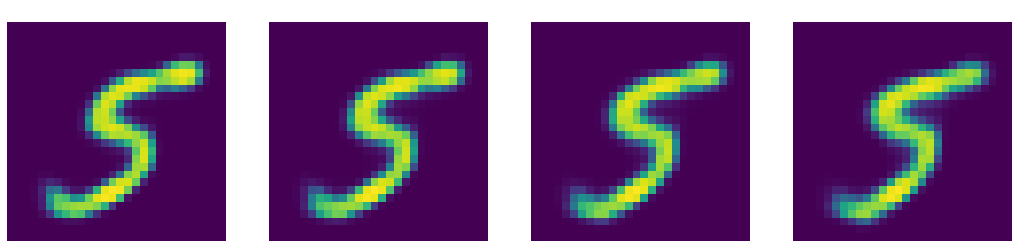

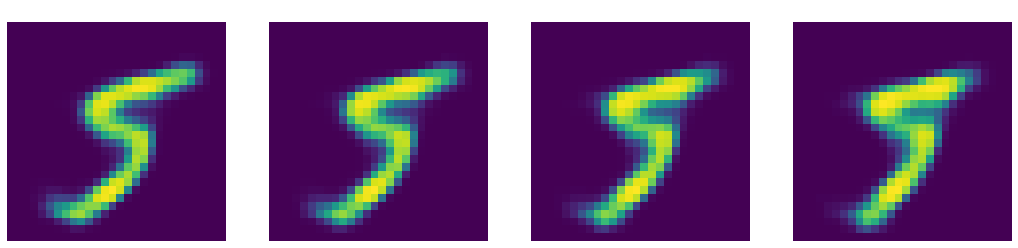

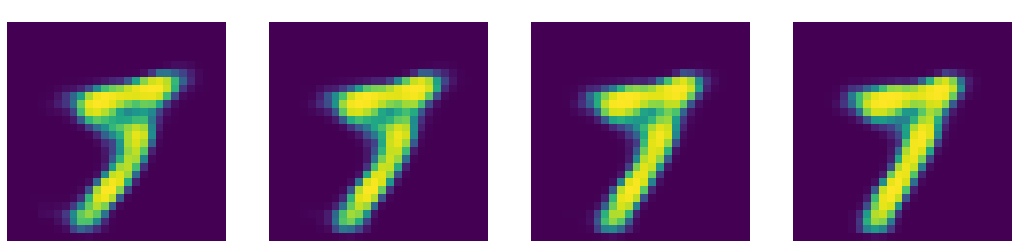

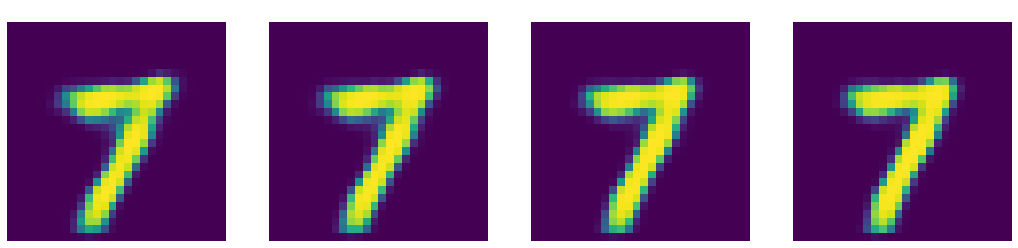

In [ ]:
# Perform an interpolation between input A and B, in N steps

N = 16
code = torch.Tensor(N, 20).to(device)
sample = torch.Tensor(N, 28, 28).to(device)
for i in range(N):
    code[i] = i / (N - 1) * mu[B].data + (1 - i / (N - 1) ) * mu[A].data
    # sample[i] = i / (N - 1) * x[B].data + (1 - i / (N - 1) ) * x[A].data
sample = model.decoder(code)
display_images(None, sample, N // 4, count=True)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE

def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)



In [ ]:
set_default(figsize=(15, 4))

In [ ]:
X, Y, E = list(), list(), list()  # input, classes, embeddings
N = 1000  # samples per epoch
epochs = (0, 5, 10)
for epoch in epochs:
    X.append(codes['μ'][epoch][:N])
    E.append(TSNE(n_components=2).fit_transform(X[-1].detach().cpu()))
    Y.append(codes['y'][epoch][:N])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

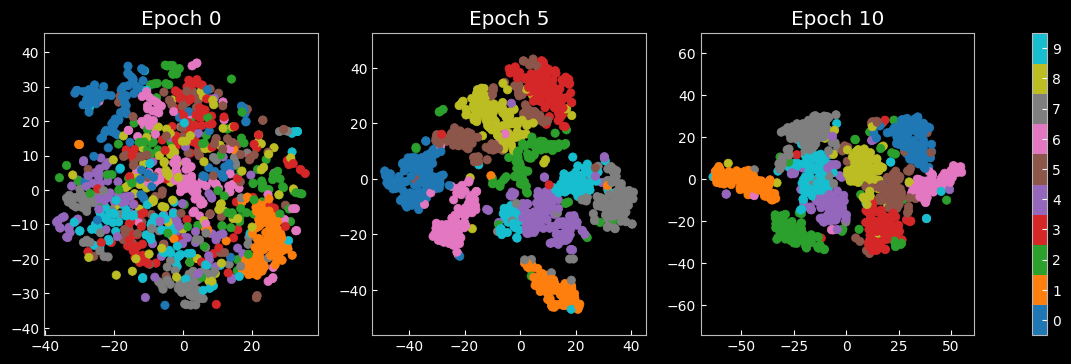

In [ ]:
f, a = plt.subplots(ncols=3)
for i, e in enumerate(epochs):
    s = a[i].scatter(E[i][:,0], E[i][:,1], c=Y[i], cmap='tab10')
    a[i].grid(False)
    a[i].set_title(f'Epoch {e}')
    a[i].axis('equal')
f.colorbar(s, ax=a[:], ticks=np.arange(10), boundaries=np.arange(11) - .5)

Below is TensorFlow and keras implementation of the provided VAE.

In [131]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Here, the encoder and decoder are constructed using as keras models with dense layers.

In [132]:
d = 2

encoderInputs = keras.Input(shape=(28, 28, 1))
x=keras.layers.Flatten()(encoderInputs)
x=keras.layers.Dense(d**2,activation='relu')(x)
x=keras.layers.Dense(2*d)(x)

zMean = layers.Dense(d, name="z_mean")(x)
zLogVar = layers.Dense(d, name="z_log_var")(x)
z = Sampling()([zMean, zLogVar])
encoder = keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 flatten_12 (Flatten)           (None, 784)          0           ['input_27[0][0]']               
                                                                                                  
 dense_44 (Dense)               (None, 4)            3140        ['flatten_12[0][0]']             
                                                                                                  
 dense_45 (Dense)               (None, 4)            20          ['dense_44[0][0]']               
                                                                                            

In [133]:
latentInputs = keras.Input(shape=(d,))
x=layers.Dense(d**2,activation='relu')(latentInputs)
x=layers.Dense(784,activation='sigmoid')(x)
decoderOutputs=layers.Reshape((28,28,1))(x)
decoder = keras.Model(latentInputs, decoderOutputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_46 (Dense)            (None, 4)                 12        
                                                                 
 dense_47 (Dense)            (None, 784)               3920      
                                                                 
 reshape_7 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 3,932
Trainable params: 3,932
Non-trainable params: 0
_________________________________________________________________


Below is the main class for the VAE. It takes the encoder and decoder built above and creates a single model. It also takes in a value for $\beta $ which will become useful in the next section. The train function computes the error for some training data, then using tensorflows gradient functions, the weights of the model are updated.

In [134]:
class Sampling(layers.Layer):
    #samples the encoding vector z

    def call(self, inputs):
        zMean, zLogVar = inputs
        batch = tf.shape(zMean)[0]
        dim = tf.shape(zMean)[1]
        eps = tf.keras.backend.random_normal(shape=(batch, dim))
        return zMean + tf.exp(0.5 * zLogVar) * eps

In [137]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta,**kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.totalLossMean = keras.metrics.Mean(name="total_loss")
        self.recLossMean = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.klLossMean = keras.metrics.Mean(name="kl_loss")
        self.beta=beta

    @property
    def metrics(self):
        return [self.totalLossMean, self.recLossMean, self.klLossMean,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zlv, z = self.encoder(data)
            rec = self.decoder(z)
            recLoss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, rec), axis=(1, 2)
                )
            )
            klLoss = -self.beta * (1 + zlv - tf.square(zMean) - tf.exp(zlv))
            klLoss = tf.reduce_mean(tf.reduce_sum(klLoss, axis=1))
            total_loss = recLoss + klLoss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.totalLossMean.update_state(total_loss)
        self.recLossMean.update_state(recLoss)
        self.klLossMean.update_state(klLoss)
        
        return {
            "loss": self.totalLossMean.result(),
            "reconstruction_loss": self.recLossMean.result(),
            "kl_loss": self.klLossMean.result(),
        }

In [138]:
(xTrain, _), (xTest, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([xTrain, xTest], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder,0.5)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 8s 12ms/step - loss: 349.1852 - reconstruction_loss: 249.9171 - kl_loss: 20.4510
Epoch 2/10
547/547 [==============================] - 5s 8ms/step - loss: 208.3600 - reconstruction_loss: 194.3684 - kl_loss: 10.2225
Epoch 3/10
547/547 [==============================] - 4s 8ms/step - loss: 197.5949 - reconstruction_loss: 188.5355 - kl_loss: 7.4848
Epoch 4/10
547/547 [==============================] - 4s 8ms/step - loss: 192.7774 - reconstruction_loss: 185.4754 - kl_loss: 6.3376
Epoch 5/10
547/547 [==============================] - 4s 8ms/step - loss: 189.6880 - reconstruction_loss: 183.3636 - kl_loss: 5.5771
Epoch 6/10
547/547 [==============================] - 4s 8ms/step - loss: 187.2809 - reconstruction_loss: 181.7555 - kl_loss: 5.0777
Epoch 7/10
547/547 [==============================] - 4s 8ms/step - loss: 185.3046 - reconstruction_loss: 179.9907 - kl_loss: 4.7668
Epoch 8/10
547/547 [==============================] - 4s 8ms/step 

In [141]:
def plotLatentSpace(vaeModel, n, figsize=8):
    # display a 5x5 2D plot of digits
    
    digitDim = 28
    scale = 1.0
    
    figure = np.zeros((digitDim * n, digitDim * n))
    
    xGrid = np.linspace(-scale, scale, n)
    yGrid = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(yGrid):
        for j, xi in enumerate(xGrid):
            zSample = np.array([[xi, yi]])
            xDecoded = vaeModel.decoder.predict(zSample)
            digit = xDecoded[0].reshape(digitDim, digitDim)
            figure[
                i * digitDim : (i + 1) * digitDim,
                j * digitDim : (j + 1) * digitDim,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digitDim // 2
    end_range = n * digitDim + start_range
    pixel_range = np.arange(start_range, end_range, digitDim)
    sample_range_x = np.round(xGrid, 1)
    sample_range_y = np.round(yGrid, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    
    plt.imshow(figure)
    plt.show()

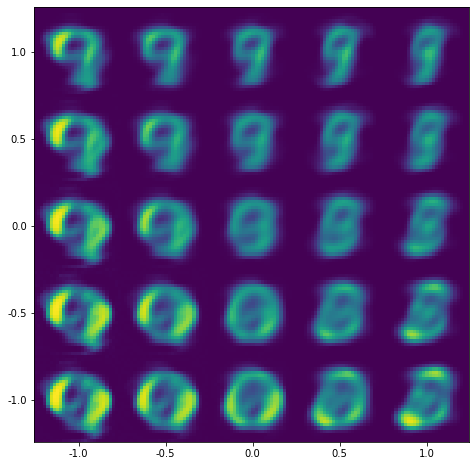

In [142]:
plotLatentSpace(vae,5)

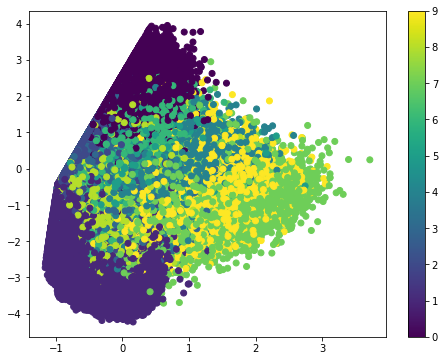

In [128]:
def plotClusters(vae, data, labels):
    # scatter plot of class distribution in latent space
    zMean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(8, 6))
    plt.scatter(zMean[:, 0], zMean[:, 1], c=labels)
    plt.colorbar()
    
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plotClusters(vae, x_train, y_train)

### Experiment with Different Model Configurations



*   You shall modify the *optimizer* in your TensorFlow implementation to use a different optimization method than Adam and discuss the results as compared to the baseline.
*   You shall parameterize the coefficient 0.5 in the expression for the KL divergence in the loss function in you TensorFlow implementation and run experiments using different values for this parameter, which varies the amount of regularization. Report and discuss your results.



Below is a comparison of 3 VAEs with $β=0.5$ and the RMSprop optimizer rather than Adam. 

In [115]:
d = 2
#encoder
encoderInputs = keras.Input(shape=(28, 28, 1))
x=keras.layers.Flatten()(encoderInputs)
x=keras.layers.Dense(d**2,activation='relu')(x)
x=keras.layers.Dense(2*d)(x)

zMean = layers.Dense(d, name="z_mean")(x)
zLogVar = layers.Dense(d, name="z_log_var")(x)
z = Sampling()([zMean, zLogVar])
encoder = keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")

#decoder
latentInputs = keras.Input(shape=(d,))
x=layers.Dense(d**2,activation='relu')(latentInputs)
x=layers.Dense(784,activation='sigmoid')(x)
decoderOutputs=layers.Reshape((28,28,1))(x)
decoder = keras.Model(latentInputs, decoderOutputs, name="decoder")

#model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta,**kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.totalLossMean = keras.metrics.Mean(name="total_loss")
        self.recLossMean = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.klLossMean = keras.metrics.Mean(name="kl_loss")
        self.beta=beta

    @property
    def metrics(self):
        return [self.totalLossMean, self.recLossMean, self.klLossMean,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zlv, z = self.encoder(data)
            rec = self.decoder(z)
            recLoss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, rec), axis=(1, 2)
                )
            )
            klLoss = -self.beta * (1 + zlv - tf.square(zMean) - tf.exp(zlv))
            klLoss = tf.reduce_mean(tf.reduce_sum(klLoss, axis=1))
            total_loss = recLoss + klLoss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.totalLossMean.update_state(total_loss)
        self.recLossMean.update_state(recLoss)
        self.klLossMean.update_state(klLoss)
        
        return {
            "loss": self.totalLossMean.result(),
            "reconstruction_loss": self.recLossMean.result(),
            "kl_loss": self.klLossMean.result(),
        }

In [116]:
(xTrain, _), (xTest, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([xTrain, xTest], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder,0.5)
vae.compile(optimizer=keras.optimizers.RMSprop())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 6s 8ms/step - loss: 320.5293 - reconstruction_loss: 237.0730 - kl_loss: 13.3451
Epoch 2/10
547/547 [==============================] - 4s 8ms/step - loss: 198.0154 - reconstruction_loss: 190.1452 - kl_loss: 4.6911
Epoch 3/10
547/547 [==============================] - 4s 8ms/step - loss: 190.4116 - reconstruction_loss: 185.7724 - kl_loss: 3.9743
Epoch 4/10
547/547 [==============================] - 4s 8ms/step - loss: 188.4404 - reconstruction_loss: 184.0892 - kl_loss: 3.8619
Epoch 5/10
547/547 [==============================] - 4s 8ms/step - loss: 186.6462 - reconstruction_loss: 182.4794 - kl_loss: 3.8190
Epoch 6/10
547/547 [==============================] - 4s 8ms/step - loss: 184.5646 - reconstruction_loss: 180.2574 - kl_loss: 3.8274
Epoch 7/10
547/547 [==============================] - 4s 8ms/step - loss: 182.4016 - reconstruction_loss: 178.1055 - kl_loss: 3.8526
Epoch 8/10
547/547 [==============================] - 4s 8ms/step - 

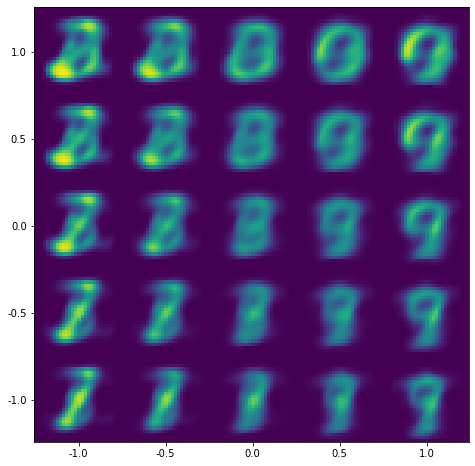

In [129]:
plotLatentSpace(vae,5)

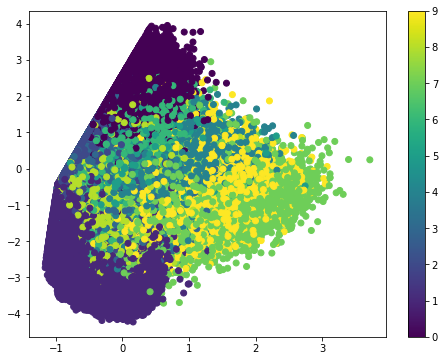

In [130]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plotClusters(vae, x_train, y_train)

Finally, below are 3 models using the Adam optimizer and varying the value of $β$. I tried several different values, but only present the results for $\beta=[0.25,1,10]$ here.  

In [ ]:
d = 2
#encoder
encoderInputs = keras.Input(shape=(28, 28, 1))
x=keras.layers.Flatten()(encoderInputs)
x=keras.layers.Dense(d**2,activation='relu')(x)
x=keras.layers.Dense(2*d)(x)

zMean = layers.Dense(d, name="z_mean")(x)
zLogVar = layers.Dense(d, name="z_log_var")(x)
z = Sampling()([zMean, zLogVar])
encoder = keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")

#decoder
latentInputs = keras.Input(shape=(d,))
x=layers.Dense(d**2,activation='relu')(latentInputs)
x=layers.Dense(784,activation='sigmoid')(x)
decoderOutputs=layers.Reshape((28,28,1))(x)
decoder = keras.Model(latentInputs, decoderOutputs, name="decoder")

#model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta,**kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.totalLossMean = keras.metrics.Mean(name="total_loss")
        self.recLossMean = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.klLossMean = keras.metrics.Mean(name="kl_loss")
        self.beta=beta

    @property
    def metrics(self):
        return [self.totalLossMean, self.recLossMean, self.klLossMean,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zlv, z = self.encoder(data)
            rec = self.decoder(z)
            recLoss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, rec), axis=(1, 2)
                )
            )
            klLoss = -self.beta * (1 + zlv - tf.square(zMean) - tf.exp(zlv))
            klLoss = tf.reduce_mean(tf.reduce_sum(klLoss, axis=1))
            total_loss = recLoss + klLoss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.totalLossMean.update_state(total_loss)
        self.recLossMean.update_state(recLoss)
        self.klLossMean.update_state(klLoss)
        
        return {
            "loss": self.totalLossMean.result(),
            "reconstruction_loss": self.recLossMean.result(),
            "kl_loss": self.klLossMean.result(),
        }

In [ ]:
(xTrain, _), (xTest, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([xTrain, xTest], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder,0.25)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 5s 8ms/step - loss: 347.0456 - reconstruction_loss: 250.0101 - kl_loss: 20.1449
Epoch 2/10
547/547 [==============================] - 6s 11ms/step - loss: 212.0784 - reconstruction_loss: 202.1467 - kl_loss: 7.0386
Epoch 3/10
547/547 [==============================] - 6s 11ms/step - loss: 203.7947 - reconstruction_loss: 197.1541 - kl_loss: 4.9622
Epoch 4/10
547/547 [==============================] - 4s 8ms/step - loss: 196.3861 - reconstruction_loss: 189.6686 - kl_loss: 4.1461
Epoch 5/10
547/547 [==============================] - 4s 7ms/step - loss: 187.4269 - reconstruction_loss: 182.5625 - kl_loss: 3.7283
Epoch 6/10
547/547 [==============================] - 4s 7ms/step - loss: 183.3656 - reconstruction_loss: 179.5537 - kl_loss: 3.0753
Epoch 7/10
547/547 [==============================] - 4s 7ms/step - loss: 181.1510 - reconstruction_loss: 178.3060 - kl_loss: 2.6780
Epoch 8/10
547/547 [==============================] - 4s 7ms/step 

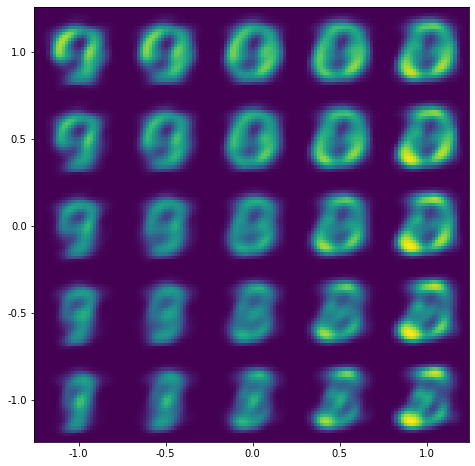

In [ ]:
plotLatentSpace(vae,5)

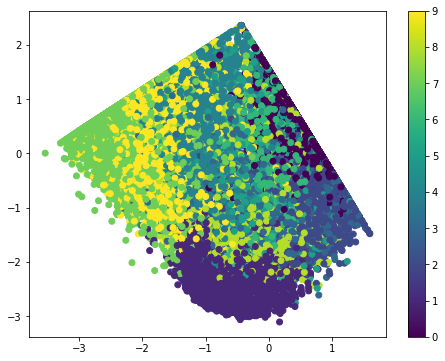

In [ ]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plotClusters(vae, x_train, y_train)

In [ ]:
d = 2
#encoder
encoderInputs = keras.Input(shape=(28, 28, 1))
x=keras.layers.Flatten()(encoderInputs)
x=keras.layers.Dense(d**2,activation='relu')(x)
x=keras.layers.Dense(2*d)(x)

zMean = layers.Dense(d, name="z_mean")(x)
zLogVar = layers.Dense(d, name="z_log_var")(x)
z = Sampling()([zMean, zLogVar])
encoder = keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")

#decoder
latentInputs = keras.Input(shape=(d,))
x=layers.Dense(d**2,activation='relu')(latentInputs)
x=layers.Dense(784,activation='sigmoid')(x)
decoderOutputs=layers.Reshape((28,28,1))(x)
decoder = keras.Model(latentInputs, decoderOutputs, name="decoder")

#model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta,**kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.totalLossMean = keras.metrics.Mean(name="total_loss")
        self.recLossMean = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.klLossMean = keras.metrics.Mean(name="kl_loss")
        self.beta=beta

    @property
    def metrics(self):
        return [self.totalLossMean, self.recLossMean, self.klLossMean,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zlv, z = self.encoder(data)
            rec = self.decoder(z)
            recLoss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, rec), axis=(1, 2)
                )
            )
            klLoss = -self.beta * (1 + zlv - tf.square(zMean) - tf.exp(zlv))
            klLoss = tf.reduce_mean(tf.reduce_sum(klLoss, axis=1))
            total_loss = recLoss + klLoss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.totalLossMean.update_state(total_loss)
        self.recLossMean.update_state(recLoss)
        self.klLossMean.update_state(klLoss)
        
        return {
            "loss": self.totalLossMean.result(),
            "reconstruction_loss": self.recLossMean.result(),
            "kl_loss": self.klLossMean.result(),
        }

In [ ]:
(xTrain, _), (xTest, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([xTrain, xTest], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder,1)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 6s 9ms/step - loss: 390.0533 - reconstruction_loss: 282.2499 - kl_loss: 14.5862
Epoch 2/10
547/547 [==============================] - 6s 11ms/step - loss: 215.7954 - reconstruction_loss: 205.3467 - kl_loss: 8.3086
Epoch 3/10
547/547 [==============================] - 6s 11ms/step - loss: 209.2179 - reconstruction_loss: 201.2491 - kl_loss: 6.7039
Epoch 4/10
547/547 [==============================] - 6s 11ms/step - loss: 204.7551 - reconstruction_loss: 197.6730 - kl_loss: 5.8195
Epoch 5/10
547/547 [==============================] - 6s 11ms/step - loss: 200.0695 - reconstruction_loss: 192.5468 - kl_loss: 5.8476
Epoch 6/10
547/547 [==============================] - 4s 7ms/step - loss: 193.5977 - reconstruction_loss: 185.5444 - kl_loss: 6.6593
Epoch 7/10
547/547 [==============================] - 4s 7ms/step - loss: 189.2473 - reconstruction_loss: 182.2497 - kl_loss: 6.5982
Epoch 8/10
547/547 [==============================] - 4s 7ms/ste

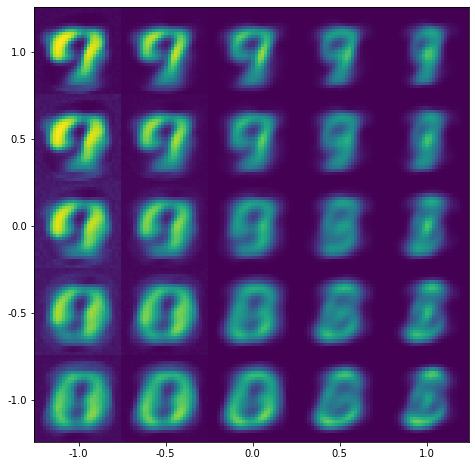

In [ ]:
plotLatentSpace(vae,5)

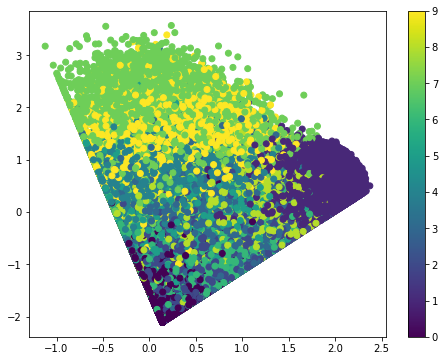

In [ ]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plotClusters(vae, x_train, y_train)

In [ ]:
d = 2
#encoder
encoderInputs = keras.Input(shape=(28, 28, 1))
x=keras.layers.Flatten()(encoderInputs)
x=keras.layers.Dense(d**2,activation='relu')(x)
x=keras.layers.Dense(2*d)(x)

zMean = layers.Dense(d, name="z_mean")(x)
zLogVar = layers.Dense(d, name="z_log_var")(x)
z = Sampling()([zMean, zLogVar])
encoder = keras.Model(encoderInputs, [zMean, zLogVar, z], name="encoder")

#decoder
latentInputs = keras.Input(shape=(d,))
x=layers.Dense(d**2,activation='relu')(latentInputs)
x=layers.Dense(784,activation='sigmoid')(x)
decoderOutputs=layers.Reshape((28,28,1))(x)
decoder = keras.Model(latentInputs, decoderOutputs, name="decoder")

#model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, beta,**kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.totalLossMean = keras.metrics.Mean(name="total_loss")
        self.recLossMean = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.klLossMean = keras.metrics.Mean(name="kl_loss")
        self.beta=beta

    @property
    def metrics(self):
        return [self.totalLossMean, self.recLossMean, self.klLossMean,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            zMean, zlv, z = self.encoder(data)
            rec = self.decoder(z)
            recLoss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, rec), axis=(1, 2)
                )
            )
            klLoss = -self.beta * (1 + zlv - tf.square(zMean) - tf.exp(zlv))
            klLoss = tf.reduce_mean(tf.reduce_sum(klLoss, axis=1))
            total_loss = recLoss + klLoss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.totalLossMean.update_state(total_loss)
        self.recLossMean.update_state(recLoss)
        self.klLossMean.update_state(klLoss)
        
        return {
            "loss": self.totalLossMean.result(),
            "reconstruction_loss": self.recLossMean.result(),
            "kl_loss": self.klLossMean.result(),
        }

In [ ]:
(xTrain, _), (xTest, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([xTrain, xTest], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder,10)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 6s 9ms/step - loss: 425.3861 - reconstruction_loss: 310.4753 - kl_loss: 26.5124
Epoch 2/10
547/547 [==============================] - 4s 7ms/step - loss: 237.8481 - reconstruction_loss: 214.2056 - kl_loss: 18.3818
Epoch 3/10
547/547 [==============================] - 4s 7ms/step - loss: 222.1199 - reconstruction_loss: 208.1651 - kl_loss: 11.8289
Epoch 4/10
547/547 [==============================] - 4s 7ms/step - loss: 214.6961 - reconstruction_loss: 205.4468 - kl_loss: 7.7941
Epoch 5/10
547/547 [==============================] - 4s 7ms/step - loss: 208.9092 - reconstruction_loss: 203.4909 - kl_loss: 4.5265
Epoch 6/10
547/547 [==============================] - 4s 7ms/step - loss: 206.0057 - reconstruction_loss: 202.5235 - kl_loss: 3.4983
Epoch 7/10
547/547 [==============================] - 4s 7ms/step - loss: 205.6224 - reconstruction_loss: 201.9745 - kl_loss: 3.5347
Epoch 8/10
547/547 [==============================] - 4s 7ms/step 

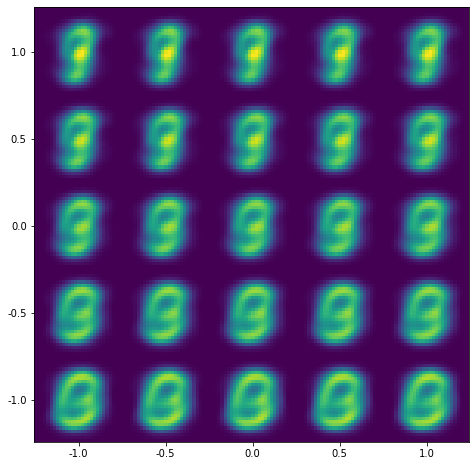

In [ ]:
plotLatentSpace(vae,5)

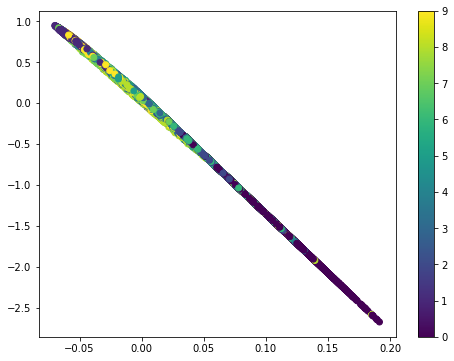

In [ ]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plotClusters(vae, x_train, y_train)

The cells above suggest that as the value of the regularization $\beta$ increases the class distribution in latent space becomes more constricted. Intuitively, this makes sense, since regularization is the act of limiting the parameters of a model to within certain bounds. 